# Breast Cancer Detection

# Import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Import dataset

In [2]:
dataset=pd.read_csv("D:/Project/Breast cancer detection/data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Exploration

 Check the no. of rows and columns in the dataset

In [3]:
dataset.shape

(569, 33)

check the details about the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

get the statistical summary about the dataset

In [5]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


check dataset with having categorical columns

In [6]:
dataset.select_dtypes(include=["object"]).columns


Index(['diagnosis'], dtype='object')

check the total no. of categorical dataset

In [7]:
len(dataset.select_dtypes(include=["object"]).columns)

1

check the dataset with having numerical columns and also check the length

In [8]:
dataset.select_dtypes(include=["int64", "float64"]).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
len(dataset.select_dtypes(include=["int64", "float64"]).columns)

32

get list of all columns 

In [10]:
pd.Series(dataset.columns)

0                          id
1                   diagnosis
2                 radius_mean
3                texture_mean
4              perimeter_mean
5                   area_mean
6             smoothness_mean
7            compactness_mean
8              concavity_mean
9         concave points_mean
10              symmetry_mean
11     fractal_dimension_mean
12                  radius_se
13                 texture_se
14               perimeter_se
15                    area_se
16              smoothness_se
17             compactness_se
18               concavity_se
19          concave points_se
20                symmetry_se
21       fractal_dimension_se
22               radius_worst
23              texture_worst
24            perimeter_worst
25                 area_worst
26           smoothness_worst
27          compactness_worst
28            concavity_worst
29       concave points_worst
30             symmetry_worst
31    fractal_dimension_worst
32                Unnamed: 32
dtype: obj

#  Dealing with missing values

check if there is any missing values or not

In [11]:
dataset.isnull().values.any()

True

check the total number of missing values in the dataset


In [12]:
dataset.isnull().values.sum()


569

get columns having null values

In [13]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

Check the total number of columns having missing values

In [14]:
len(dataset.columns[dataset.isnull().any()])

1

check the total number of values in column having null values

In [15]:
dataset['Unnamed: 32'].count()

0

drop the column 'Unnamed: 32' because entire row is empty

In [16]:
dataset=dataset.drop('Unnamed: 32',axis=1)
dataset.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Now let's again check the dataset shape

In [17]:
dataset.shape

(569, 32)

Now again check if there is any null value or not

In [18]:
dataset.isnull().values.any()

False

# Dealing with categorical dataset

Check the dataset with having categorical dataset

In [19]:
dataset.select_dtypes(include="object").columns

Index(['diagnosis'], dtype='object')

check the unique values in "diagnosis"

In [20]:
dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

check the number of unique values in "diagnosis" column


In [21]:
dataset["diagnosis"].nunique()

2

Now do one hot encoding on "diagnosis" to covert categorical columns into numerical columns

In [22]:
dataset=pd.get_dummies(data=dataset, drop_first=True)
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Count plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


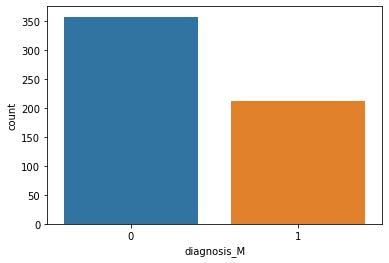

In [23]:
sn.countplot(dataset["diagnosis_M"],label="Count")
plt.show()

Count the no. of "M" and "V" values
M represents 1
V represents 0

In [24]:
dataset["diagnosis_M"].value_counts()

0    357
1    212
Name: diagnosis_M, dtype: int64

# Correlation and heatmap

In [25]:
dataset2=dataset.drop(columns="diagnosis_M")
dataset2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now draw graph to find the correlation of independent variable with dependent variable 

<AxesSubplot:title={'center':'Correlated with diagosis_M'}>

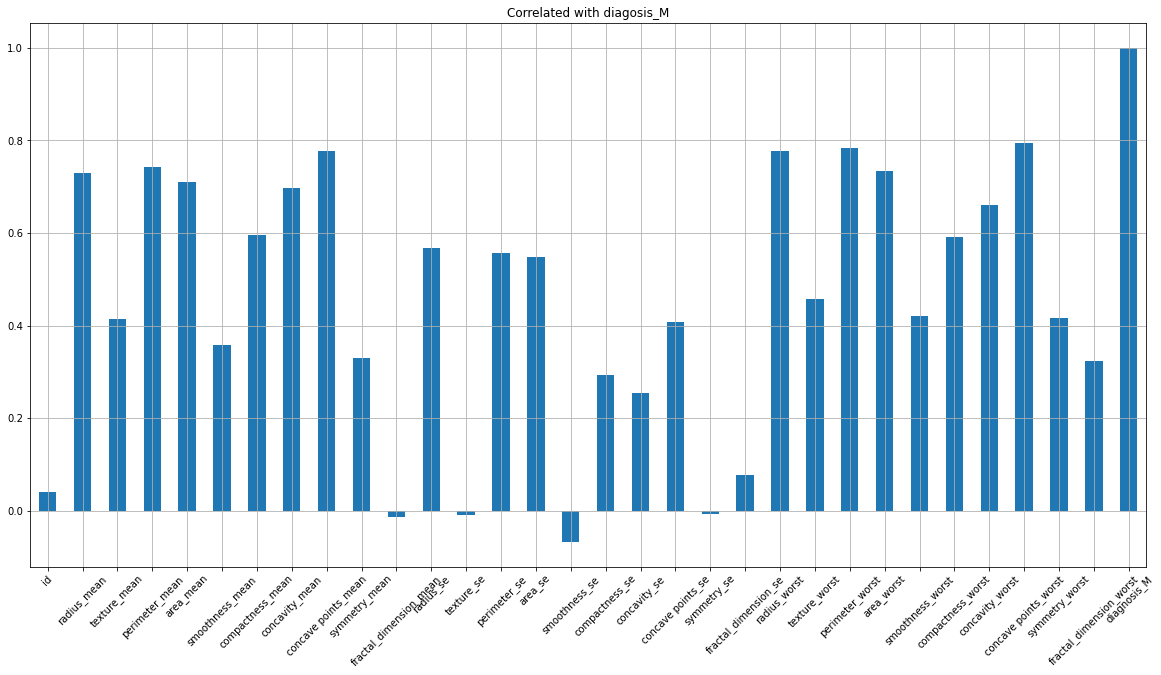

In [26]:
dataset.corrwith(dataset["diagnosis_M"]).plot.bar(
figsize=(20,10),title="Correlated with diagosis_M",rot=45,grid=True
)

Now define the correlation matrix

In [27]:
corr=dataset2.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


now draw the heat map

<AxesSubplot:>

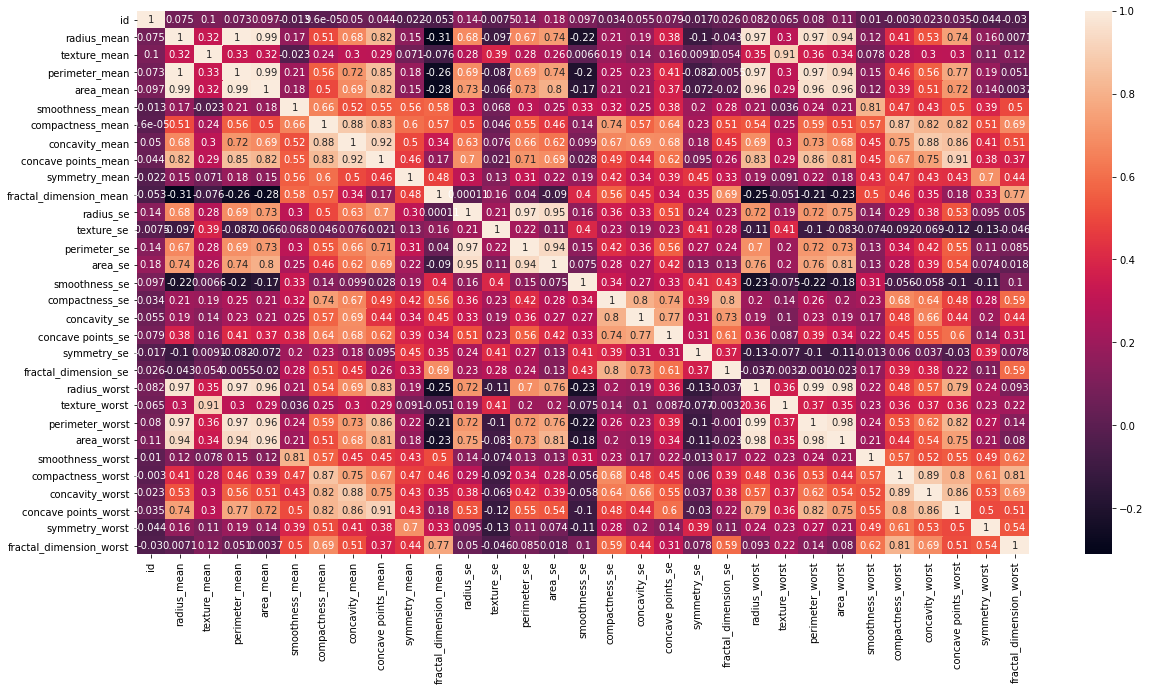

In [28]:
plt.figure(figsize=(20,10))
sn.heatmap(corr,annot=True)

# Now Split the dataset into training and testing dataset

check the dataset

In [29]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Seperate the dataset into dependent and independent variales

In [30]:
x=dataset.iloc[:,1:-1].values
x.shape

(569, 30)

In [31]:
y=dataset.iloc[:,-1].values
y.shape

(569,)

Now Split it into training and testing


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Building model

# Logistic Model


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
classifier_lm=LogisticRegression(random_state=0)

In [36]:
classifier_lm.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [37]:
y_pred=classifier_lm.predict(x_test)

Check the performance of the model

In [38]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_pred,y_test)

array([[65,  2],
       [ 2, 45]], dtype=int64)

In [40]:
# now check the accuracy score
from sklearn.metrics import accuracy_score

In [41]:
accu = accuracy_score(y_pred,y_test)
accu

0.9649122807017544

In [42]:
# now check the f1 score
from sklearn.metrics import f1_score

In [43]:
f1=f1_score(y_pred,y_test)
f1

0.9574468085106385

In [44]:
# now calculate the precision ssore
from sklearn.metrics import precision_score

In [45]:
prec=precision_score(y_pred,y_test)
prec

0.9574468085106383

In [46]:
# check the recall score
from sklearn.metrics import recall_score

In [47]:
rec=recall_score(y_pred,y_test)
rec

0.9574468085106383

In [48]:
performace_table_lm=pd.DataFrame({"accuracy":accu ,
                               "f1 score":f1 , 
                               "precision score":prec,
                               "recall score":rec},
                              index=["Logistic Regression"]
                             )
performace_table_lm

,accuracy,f1 score,precision score,recall score
Logistic Regression,0.964912,0.957447,0.957447,0.957447


Cross validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
accuracies=cross_val_score(estimator=classifier_lm , X=x_train ,y=y_train , cv=10)
accuracies

array([0.97826087, 0.97826087, 0.97826087, 0.97826087, 0.95652174,
       0.93333333, 1.        , 1.        , 0.97777778, 1.        ])

In [51]:
print("Accuracy  = ",(accuracies.mean())*100)
print("Standarad deviation = ",(accuracies.std())*100)

Accuracy  =  97.80676328502416
Standarad deviation =  1.9770439179502723


# Random Forest Classifier


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
classifier_rm = RandomForestClassifier(random_state=0)

In [54]:
classifier_rm.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [55]:
y_pred=classifier_rm.predict(x_test)

Now check the performance of the model

In [56]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_pred,y_test)


array([[64,  1],
       [ 3, 46]], dtype=int64)

In [58]:
# now check the accuracy score
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_pred,y_test)
accu

0.9649122807017544

In [59]:
# now check the f1 score
from sklearn.metrics import f1_score
f1=f1_score(y_pred,y_test)
f1

0.9583333333333333

In [60]:
# now calculate the precision ssore
from sklearn.metrics import precision_score
prec=precision_score(y_pred,y_test)
prec

0.9787234042553191

In [61]:
# check the recall score
from sklearn.metrics import recall_score
rec=recall_score(y_pred,y_test)
rec

0.9387755102040817

In [62]:
performace_table_rm=pd.DataFrame({"accuracy":accu ,
                               "f1 score":f1 , 
                               "precision score":prec,
                               "recall score":rec},
                              index=["RandomForestClassifier"]
                             )
performace_table_rm

,accuracy,f1 score,precision score,recall score
RandomForestClassifier,0.964912,0.958333,0.978723,0.938776


In [63]:
# Now Concactenate both the dataframes of the model that gives the performance
result=pd.concat((performace_table_lm,performace_table_rm))
result

,accuracy,f1 score,precision score,recall score
Logistic Regression,0.964912,0.957447,0.957447,0.957447
RandomForestClassifier,0.964912,0.958333,0.978723,0.938776


Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_rm , X=x_train ,y=y_train , cv=10)
print("Accuracy  = ",(accuracies.mean())*100)
print("Standarad deviation = ",(accuracies.std())*100)

Accuracy  =  96.04830917874396
Standarad deviation =  3.070184187614762


# Randomized Search to find the best parameter (Logistic Regression)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
parameters={"penalty":["l1", "l2", "elasticnet", "none"],
            "C":[0.25,0.50,0.75,1.0,1.25,1.50,2.0],
            "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}
parameters

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [67]:
random_search=RandomizedSearchCV(estimator=classifier_lm ,param_distributions=parameters,n_iter=10,scoring="roc_auc",
                                 n_jobs=-1,cv=10,verbose=3)
random_search

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [68]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [69]:
random_search.best_estimator_


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [70]:
random_search.best_score_

0.9967038539553752

In [71]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}

# Finalise the Model (Logistic Model)

In [72]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver="liblinear",penalty="l1",C=0.75,random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=0.75, penalty='l1', random_state=0, solver='liblinear')

In [73]:
y_predict=classifier.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=uint8)

In [74]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_pred,y_test)
from sklearn.metrics import f1_score
f1=f1_score(y_pred,y_test)
from sklearn.metrics import precision_score
prec=precision_score(y_pred,y_test)
from sklearn.metrics import recall_score
rec=recall_score(y_pred,y_test)

In [75]:
print("Accuracy=",accu ,"\n",
      "f1_score=",f1,"\n",
      "precision score=",prec ,"\n",
      "recall score=",rec
     )

Accuracy= 0.9649122807017544 
 f1_score= 0.9583333333333333 
 precision score= 0.9787234042553191 
 recall score= 0.9387755102040817


In [76]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier , X=x_train ,y=y_train , cv=10)
print("Accuracy  = ",(accuracies.mean())*100)
print("Standarad deviation = ",(accuracies.std())*100)

Accuracy  =  97.58454106280195
Standarad deviation =  2.0793159473122382


In [77]:
performace_table_fm=pd.DataFrame({"accuracy":accu ,
                               "f1 score":f1 , 
                               "precision score":prec,
                               "recall score":rec},
                              index=["Final Logistic Model"]
                             )
performace_table_fm

,accuracy,f1 score,precision score,recall score
Final Logistic Model,0.964912,0.958333,0.978723,0.938776


In [78]:
result=pd.concat((result,performace_table_fm))
result

,accuracy,f1 score,precision score,recall score
Logistic Regression,0.964912,0.957447,0.957447,0.957447
RandomForestClassifier,0.964912,0.958333,0.978723,0.938776
Final Logistic Model,0.964912,0.958333,0.978723,0.938776


# Predict Single Observation

Look at the dataset

In [79]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [80]:
single_obs = (dataset.iloc[0:1,1:-1]).to_numpy()
single_obs


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [81]:
#classification for single observation on logistic model
classifier.predict(scaler.transform(single_obs))

array([1], dtype=uint8)